# Machine Learning - diabetes

### van: Mart Veldkamp

# Inhoudsopgave

1. [Inleiding](#Inleiding)
2. [Het probleem](#probleem)
3. [Library's laden + data ophalen](#ophalen)
4. [Data visualiseren](#visualiseren)
    - [Distributies](#Distributies)
    - [Features tov. target vector](#vector)
    - [Normaalverdeling](#Normaalverdeling)
5. [Data voorbereiden & opschonen](#opschonen)
    - [Null waardes weghalen](#weghalen)
    - [Normaliseren](#Normaliseren)
    - [Data opsplitsen](#opsplitsen)
6. [Modellen selecteren](#selecteren)
    - [Logistic regression](#regression)
    - [kNN](#kNN)
7. [Modellen trainen en testen](#testen1)
    - [Modellen trainen](#trainen)
    - [Modellen testen](#testen2)
    - [coefficienten en intercept](#intercept)
    - [de accuracy, precision, recall en f1](#f1)
    - [Confusion matrix](#matrix1)
    - [ROC/AUC -curve](#curve)
8. [Conclusie](#Conclusie)
    - [Correlatie matrix](#matrix2)
- [Bronnen](#Bronnen)


# 1. Inleiding <a class='anchor' id='Inleiding'></a>
Deze opdracht is onderdeel van het overkoepelende vak Machine Learning, dit is één van de meerdere datasets die ik gebruik in dit vak, per dataset zijn ten minste 2 verschillende classifiers gebruikt. Deze 6 opdrachten bestaan uit classificatie- en regressieproblemen. En zijn allemaal op een andere manier opgelost.

Alle code in deze opdrachten zijn van mijzelf, gebasseerd op code uit de lessen, of waar ik zelf vast liep gebaseerd op code snippets van het internet. Mocht het toch voorkomen dat er code 1 op 1 is overgenomen, dan staat dit vermeld in de bronnen

# 2. Het probleem <a class='anchor' id='probleem'></a>

Het probleem dat ik in deze notebook ga behandelen is het bepalen of een patiënt wel of niet diabetes heeft. Dit wordt gedaan aan de hand van een paar features, onder andere het glucose gehalte in het bloed. Om te bepalen of iemand wel of geen diabetes heeft zal er gekeken worden naar de dataset om zo een conclusie te halen uit voorgaande data. Dit probleem is een classificatie probleem omdat er maar 2 mogelijke uitkomsten zijn; wel of geen diabetes. Dus een binaire classificatie.

# 3. Library's laden + data ophalen <a class='anchor' id='ophalen'></a>

Deze dataset is afkomstig van DLO

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import statsmodels.api as sm
import math 
import sklearn

from pandas.plotting import scatter_matrix
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, roc_curve, roc_auc_score
from random import sample
%matplotlib inline 

In [3]:
diabetes = pd.read_csv('diabetes.csv')

print(f'De dataset heeft {diabetes.shape[0]} rijen, en {diabetes.shape[1]} kolommen')
print('\nDit zijn de features/target')
print(diabetes.dtypes)

print('\nHier een kleine sample van de dataset')
diabetes.head()

De dataset heeft 768 rijen, en 9 kolommen

Dit zijn de features/target
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Hier een kleine sample van de dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


De kolommen worden als volgt geïnterpreteerd:

- Pregnancies: De hoeveelheid zwangerschappen desbetreffende persoon heeft gehad.
- Glucose: Het glucose gehalte in het bloed.
- BloodPressure: De bloeddruk van de patient.
- SkinThickness: De dikte van hun huid.
- Insulin: Het insuline gehalte in het bloed.
- BMI: De patient hun BMI waarde.
- DiabetesPedigreeFunction: Dit is een score wat gegeven wordt, en aangeeft wat de kans van diabetes is ten opzichte van family geschiedenis.
- Age: Hoe oud de patient is.
- Outcome: Dit is de target, en 0 staat voor geen diabetes, en 1 staat voor wel diabetes.

# 4. Data visualiseren <a class='anchor' id='visualiseren'></a>

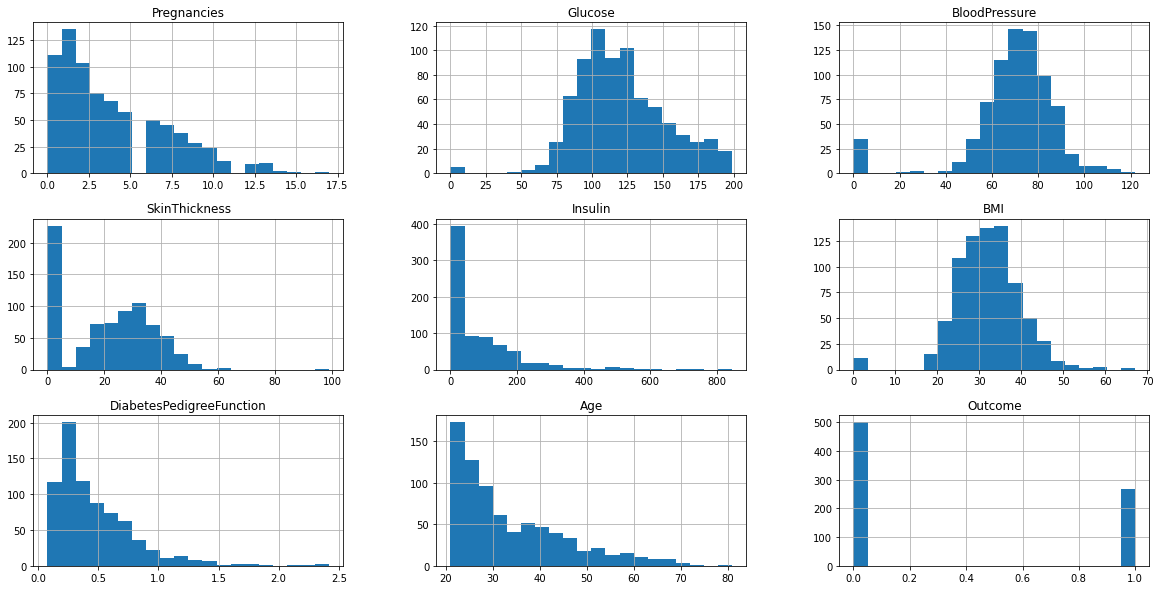

In [4]:
 diabetes.hist(bins = 20, figsize = (20,10));

Het belangrijkste wat je hier kan zien is dat we in onze dataset vooral te maken hebben met jongen mensen, dit betekend van mensen tussen de 20 en 30 jaar. Daarnaast zie je dat sommigen waardes aangepast moeten worden, zoals de BloodPressure is bij sommigen mensen 0... Dit is natuurlijk niet mogelijk en zal aangepast moeten worden. Verder zie je dat de BMI en BloodPressure lijken op een normaalverdeling, met mogelijk een paar outliers.

Verder is het ook logisch dat de meeste Pregnancies tussen de 0 en 2 vallen, aangezien we te maken hebben met een jognen mensen. Is de kans dat ze zwanger zijn lager dan bij een oudere groep mensen. Ten slot zie je dat bij de Outcome er een stuk meer mensen geen diabetes hebben ten opzichte van die wel diabetes hebben, dit is in ons geval jammer aangezien dit de label is waar we op gaan trainen.

# 5. Data voorbereiden & opschonen <a class='anchor' id='opschonen'></a>

## Null waardes weghalen <a class='anchor' id='weghalen'></a>

Om te controleren of elke kolom gevuld is kan het onderstaande gebruikt worden.

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Zoals je kan zien zijn er bij een aantal Columns nog een paar 0-waardes. Omdat de dataset niet groot is zal ik deze missende waardes vervangen voor het gemiddelde. Zodat we de data wel kunnen gebruiken om te trainen en testen.

In [6]:
diabetes['Glucose'] = diabetes['Glucose'].replace(0, diabetes['Glucose'].mean())
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0, diabetes['BloodPressure'].mean())
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0, diabetes['SkinThickness'].mean())
diabetes['BMI'] = diabetes['BMI'].replace(0, diabetes['BMI'].mean())
diabetes['Age'] = diabetes['Age'].replace(0, diabetes['Age'].mean())

Ik vervang hier de plekken waar de waarde 0 onrealistisch is ten opzichte van het gemiddelde. Let op: Haal geen 0 waardes die kloppen weg, zoals Pregnancies of Insulin.

## Normaliseren <a class='anchor' id='Normaliseren'></a>

Bij standaardisering/normalisering wordt de data zo omgevord dat het gemiddelde gelijk is aan 0, en de standaardafwijking gelijk aan1. Dit wordt gedaan door de data om te vormen naar een z-score, zoals eerder behandeld. Dit is ook een soort van normalisatie van de data. Het heeft als voordeel dat er minder 'biases' in de data zitten. Dit passen we allen toe op numerieke data.

In [7]:
diabetes_z = diabetes.copy()
scaler = StandardScaler().fit(diabetes_z[['Age', 'BMI', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'SkinThickness']])
diabetes_z[['Age', 'BMI', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'SkinThickness']] = scaler.transform(diabetes_z[['Age', 'BMI', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'SkinThickness']])

## Data opsplitsen <a class='anchor' id='opsplitsen'></a>

In [8]:
x_diabetes = diabetes_z.drop('Outcome', axis=1)
y_diabetes = diabetes_z['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x_diabetes, y_diabetes, test_size = 0.2, random_state = 42)

# 6. Modellen selecteren & instellen <a class='anchor' id='instellen'></a>

Voor deze opdracht zullen 2 moddelen gebruikt worden:

- Logistsche regressie
- KNN

Uit desk-research maak ik de volgende hypothese over de resultaten: Ik ga ervanuit dat Logistsche regressie het snelst zal zijn, maar kNN makkelijker aan te passen is door middel van de hyperparameter k te 'tunen'. Dit kan lijden tot een accurater model.

# 7. Modellen trainen en testen <a class='anchor' id='testen1'></a>

## Logistic regression <a class='anchor' id='regression'></a>

### Train en test het model  <a class='anchor' id='model'></a>

In [9]:
lg_model = LogisticRegression()
lg_model.fit(x_train, y_train)

pred = lg_model.predict(x_test)

### coefficienten en intercept <a class='anchor' id='intercept'></a>

In [10]:
coeff = pd.DataFrame({'coeff':lg_model.coef_[0], 'label':x_train.columns})
print(coeff.sort_values(by = 'coeff'))

intercept = lg_model.intercept_
print('\n Intercept: ', intercept[0])

      coeff                     label
4 -0.237382                   Insulin
2 -0.177810             BloodPressure
3  0.053918             SkinThickness
0  0.221884               Pregnancies
7  0.385455                       Age
6  0.596936  DiabetesPedigreeFunction
5  0.718282                       BMI
1  1.154720                   Glucose

 Intercept:  -1.1296728597865229


### De accuracy, precision, recall en f1 <a class='anchor' id='f1'></a>

Hierin kan je per feuture de coefficient bekijken, hieruit kunenn we opmaken dat Glucose het belangrijkste was bij het bepalen of iemand wel of geen Diabetes heeft. Maar zowel BMI als DiabetesPedigreeFunction er ook toe doen.

In [11]:
print('accuracy: ',metrics.accuracy_score(y_test, pred))
print('Precision: ',metrics.precision_score(y_test, pred))
print('Recall: ',metrics.recall_score(y_test, pred))
print('f1: ',metrics.f1_score(y_test, pred))

accuracy:  0.7662337662337663
Precision:  0.6792452830188679
Recall:  0.6545454545454545
f1:  0.6666666666666666


De accuracy vindt ik tegenvallen (laag), aangezien het zelfs nog onder de 80% is. En je graag wel met een hoog percentage wil kunnen zeggen of iemand diabetes heeft of niet.

### Confusion matrix <a class='anchor' id='matrix1'></a>

In [12]:
matrix = metrics.confusion_matrix(y_test, pred)
print(matrix)

print('\nDit wil zeggen dat van de 154, Logistic regression er 118 goed heeft')
print('Dit is', 118/154*100, '%')


[[82 17]
 [19 36]]

Dit wil zeggen dat van de 154, Logistic regression er 118 goed heeft
Dit is 76.62337662337663 %


### ROC-curve <a class='anchor' id='curve'></a>

AUC 0.8176308539944903


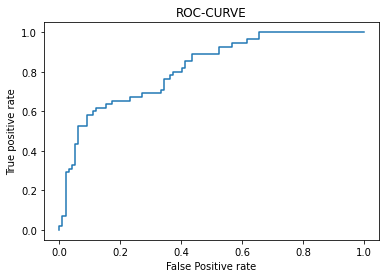

In [13]:
probs = lg_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)
print('AUC', auc)

plt.plot(fpr,tpr)
plt.title('ROC-CURVE')
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.show()

In de ROC-CURVE kan je zien dat als er een erge verticale curf aan het begin is, het een goed model is. Helaas is er rond de 0.6 een vervlakking wat betekend dat de False Positives omhoog gaan, wat betekend dat het model minder accuraat wordt. Dit is slecht.

## KNN (k-Nearest Neighbors) <a class='anchor' id='kNN'></a>

### Train en test het model

In [14]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)


pred_knn = knn_model.predict(x_test)

### De accuracy, precision, recall en f1

In [ ]:
print('accuracy: ',metrics.accuracy_score(y_test, pred_knn))
print('Precision: ',metrics.precision_score(y_test, pred_knn))
print('Recall: ',metrics.recall_score(y_test, pred_knn))
print('f1: ',metrics.f1_score(y_test, pred_knn))

accuracy:  0.7532467532467533
Precision:  0.6491228070175439
Recall:  0.6727272727272727
f1:  0.6607142857142858


### Confusion matrix

In [ ]:
matrix = metrics.confusion_matrix(y_test, pred_knn)
print(matrix)

print('\nDit wil zeggen dat van de 154, Logistic regression er 116 goed heeft')
print('Dit is', 115/154*100, '%')


[[79 20]
 [18 37]]

Dit wil zeggen dat van de 154, Logistic regression er 116 goed heeft
Dit is 74.67532467532467 %


### ROC-curve

AUC 0.8062442607897153


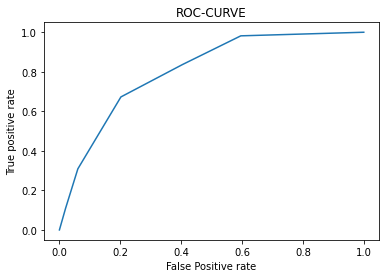

In [ ]:
probs = knn_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)
print('AUC', auc)

plt.plot(fpr,tpr)
plt.title('ROC-CURVE')
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.show()

Zoals je in deze ROC-CURVE kan zien is de grafiek zoals bij Logistic regression iets te snel aan het afdalen, wat tot meer False Positives lijd. Ik zou dezelfde conclusie moeten trekken bij knn als bij logistic regression, en dat is dat het een te lage accuracy is.

# 8. Conclusie <a class='anchor' id='Conclusie'></a>

## Correlatie matrix <a class='anchor' id='matrix2'></a>

Bij een correlatiematrix wordt de Pearson's T gebruikt. Dit correlatiecoëfficient zegt iets over twee features; als er een hoge positieve correlatie ism dat dan als het gemiddelde van ene omhoog gaat, dat de andere dan ook omhoog gaat, of juist allebei omlaag. Bij een negatieve correlatie gaat het juist andersom, dit houdt in dat als de ene omhoog gaat, de andere juist omlaag gaat. Bijvoorbeeld bij het wachten op de trein en algeme ervaring; Hoe langer iemand wacht (omhoog), hoe slechter de algemene ervaring (omlaag).

<AxesSubplot:>

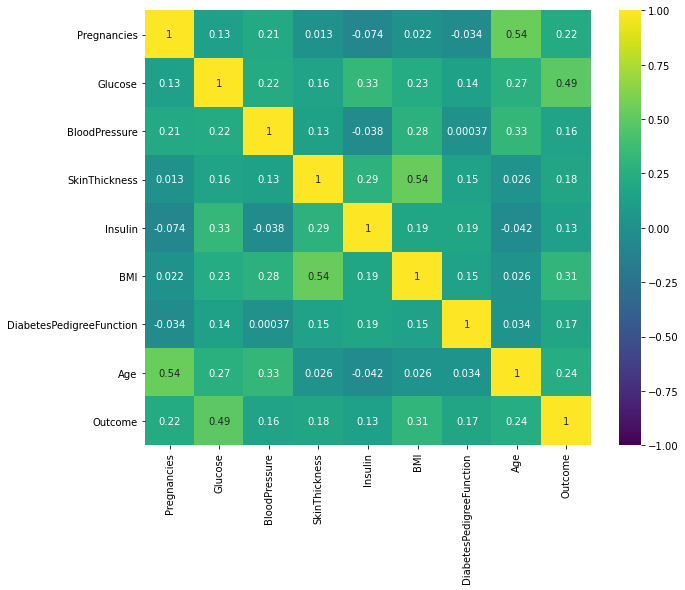

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(diabetes_z.corr(method='pearson'), annot=True, cmap='viridis', vmin=-1, vmax=1)

## Conclusie Logistic regression vs KNN (kNearest Neighbours)

Mijn uiteindelijke conclusie is dat er bijna geen verschil zit tussen beide modellen. Hoewel ik had verwacht dat KNN beter zou presenteren bleek dat toch tegen te vallen. Dit komt warscheinlijk door het feit dat dit een best kleine dataset is. Ik ga er dan ook vanuit dat beide modellen slecht werken op kleine datasets, en daarmee ook in andere opdrachten grotere datasets getest moeten worden om dit vast te stellen.